# Reading the eso Output File

## 1. Introduction

The .eso output file of an EnergyPlus simulation contains the main results of the simulation such as the hourly air temperatures or monthly energy consumption. 
The .eso file is a text file in a non-standard format.

Some, but not all, of the contents of a .eso file can be viewed as a .csv file by including the `--readvars` argument when running an EnergyPlus simulation.
This runs an additional programme after the main simulation which converts some contents in the .eso file to a .csv file. 

`eprun` provides the :py:class:`~eprun.epeso.EPEso` class to directly read the .eso file and avoid the need for the `--readvars` step.


## 2. Accessing an EPEso object instance

In `eprun` the contents of the .eso file are viewed using the :py:class:`~eprun.epeso.EPEso` class. 
A :py:class:`~eprun.epeso.EPEso` object instance is created from the results of an EnergyPlus simulation run using the :py:meth:`~eprun.eprun.eprun` function.

This tutorial is based on the '1ZoneUncontrolled.idf' EnergyPlus input file which is provided in the 'ExampleFiles' directory of the EnergyPlus install directory.
The simulation is run using the 'USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw' EnergyPlus weather file.


In [1]:
from eprun import eprun
result=eprun(ep_dir='C:\EnergyPlusV9-4-0',
             idf_filepath='1ZoneUncontrolled.idf',
             epw_filepath='USA_CA_San.Francisco.Intl.AP.724940_TMY3.epw',
             sim_dir='my_results')
eso=result.get_eso()
print(type(eso))

<class 'eprun.epeso.EPEso'>


## 3. Understanding EPEso simulation environments

An EnergyPlus input file can request that a simulation provide results for different 'simulation environments', 
such as a winter design day, a summer design day and a annual run period of hourly data.
The results of these simulation environments are stored in the same .eso file.

In our example, the '1ZoneUncontrolled.idf' contains the instructions for three simulation environments.
These are accessed using the :py:meth:`~eprun.epeso.EPEso.get_environments` method which returns a list of 
:py:class:`~eprun.epeso_simulation_environment.EPEsoSimulationEnviroment` object instances.

In [2]:
envs=eso.get_environments()
print(envs)

[EPEsoSimuationEnvironment(environment_title="DENVER CENTENNIAL  GOLDEN   N ANN HTG 99% CONDNS DB"), EPEsoSimuationEnvironment(environment_title="DENVER CENTENNIAL  GOLDEN   N ANN CLG 1% CONDNS DB=>MWB"), EPEsoSimuationEnvironment(environment_title="RUN PERIOD 1")]


In [3]:
rp1=envs[2]
print(rp1)

EPEsoSimuationEnvironment(environment_title="RUN PERIOD 1")


In [4]:
rp1.get_number_of_variables()

{'interval': 6, 'daily': 25, 'monthly': 3, 'runperiod': 0, 'annual': 0}

In [5]:
print(rp1.summary())

INTERVAL DATA
Starts at 2001-01-01T00:00:00+00:00, 8760 periods @ 60 minute intervals
7 - Environment - Site Outdoor Air Drybulb Temperature (C)
47 - ZONE ONE - Zone Total Internal Latent Gain Energy (J)
74 - ZONE ONE - Zone Mean Radiant Temperature (C)
75 - ZONE ONE - Zone Mean Air Temperature (C)
76 - ZONE ONE - Zone Air Heat Balance Surface Convection Rate (W)
77 - ZONE ONE - Zone Air Heat Balance Air Energy Storage Rate (W)
DAILY DATA
Starts at 2001-01-01T00:00:00+00:00, 365 periods @ 1 day intervals
51 - ZN001:WALL001 - Surface Inside Face Temperature (C)
52 - ZN001:WALL001 - Surface Outside Face Temperature (C)
53 - ZN001:WALL001 - Surface Inside Face Convection Heat Transfer Coefficient (W/m2-K)
54 - ZN001:WALL001 - Surface Outside Face Convection Heat Transfer Coefficient (W/m2-K)
55 - ZN001:WALL002 - Surface Inside Face Temperature (C)
56 - ZN001:WALL002 - Surface Outside Face Temperature (C)
57 - ZN001:WALL002 - Surface Inside Face Convection Heat Transfer Coefficient (W/m2-K

In [6]:
print(rp1.get_interval_summary())

Starts at 2001-01-01T00:00:00+00:00, 8760 periods @ 60 minute intervals
7 - Environment - Site Outdoor Air Drybulb Temperature (C)
47 - ZONE ONE - Zone Total Internal Latent Gain Energy (J)
74 - ZONE ONE - Zone Mean Radiant Temperature (C)
75 - ZONE ONE - Zone Mean Air Temperature (C)
76 - ZONE ONE - Zone Air Heat Balance Surface Convection Rate (W)
77 - ZONE ONE - Zone Air Heat Balance Air Energy Storage Rate (W)


In [7]:
iv7=rp1.get_interval_variable(7)
iv7

EPEsoIntervalVariable(report_code=7)

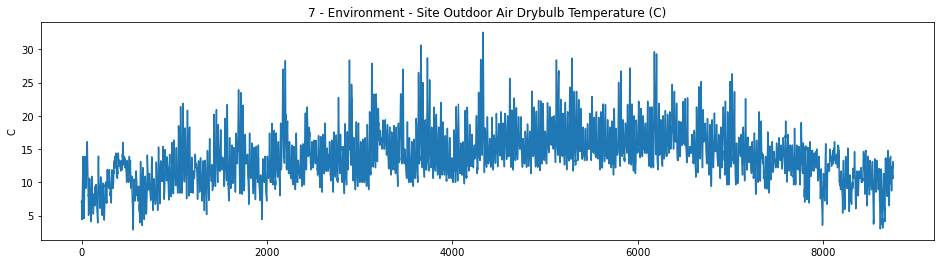

In [8]:
iv7.plot()

In [9]:
df7=iv7.get_dataframe()
df7

object_name,Environment
quantity,Site Outdoor Air Drybulb Temperature
unit,C
value_type,value
time_periods,
2001-01-01 00:00:00,7.0125
2001-01-01 01:00:00,7.2000
2001-01-01 02:00:00,6.8875
2001-01-01 03:00:00,6.3250
2001-01-01 04:00:00,5.0375
...,...


In [10]:
s=iv7.get_series()
s

2001-01-01 00:00:00     7.0125
2001-01-01 01:00:00     7.2000
2001-01-01 02:00:00     6.8875
2001-01-01 03:00:00     6.3250
2001-01-01 04:00:00     5.0375
                        ...   
2001-12-31 19:00:00    13.1125
2001-12-31 20:00:00    12.6125
2001-12-31 21:00:00    11.2000
2001-12-31 22:00:00    10.6000
2001-12-31 23:00:00    10.9125
Freq: 3600S, Name: 7 - Environment - Site Outdoor Air Drybulb Temperature (C), Length: 8760, dtype: float64

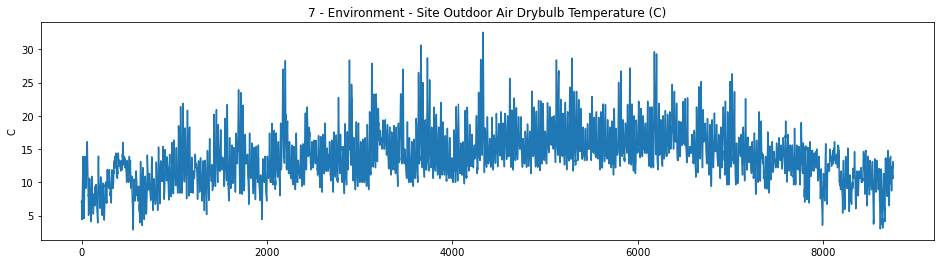

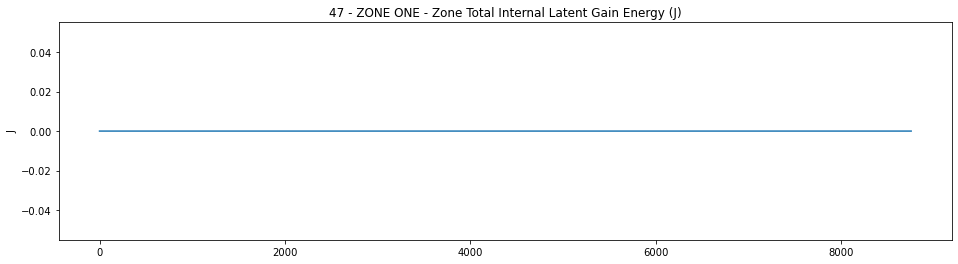

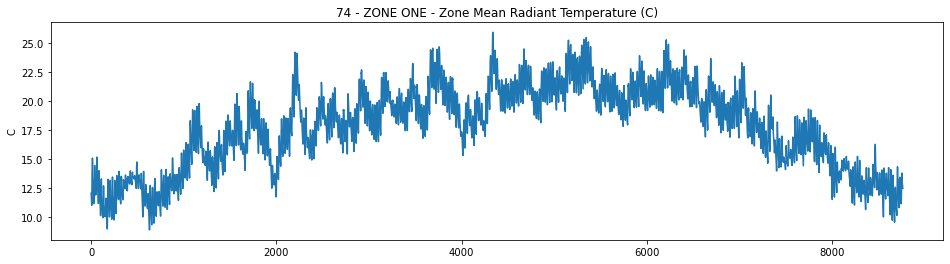

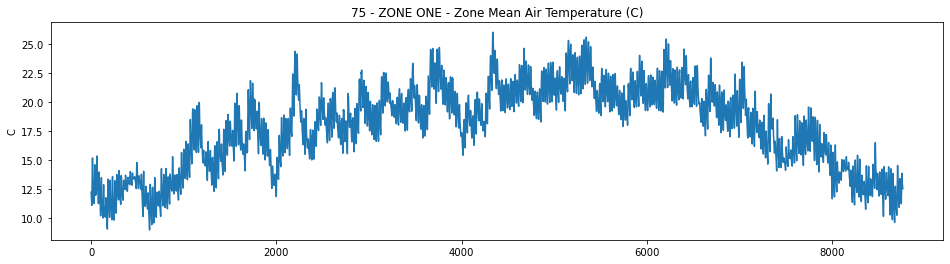

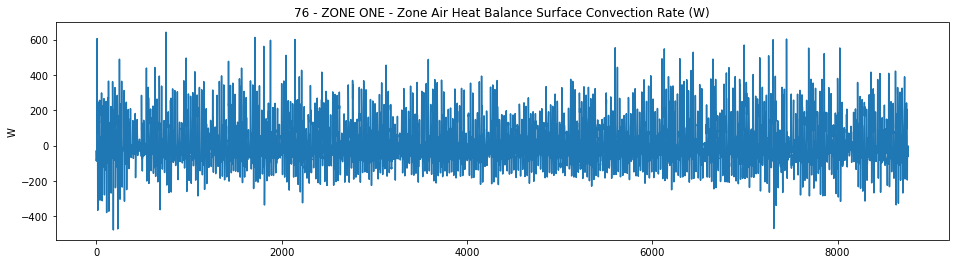

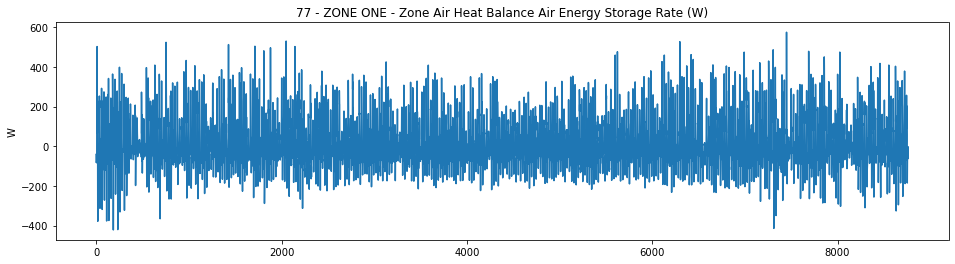

In [11]:
for v in rp1.get_interval_variables():
    v.plot()

In [12]:
rp1.get_interval_dataframe()


object_name                                  Environment  \
quantity            Site Outdoor Air Drybulb Temperature   
unit                                                   C   
value_type                                         value   
time_periods                                               
2001-01-01 00:00:00                               7.0125   
2001-01-01 01:00:00                               7.2000   
2001-01-01 02:00:00                               6.8875   
2001-01-01 03:00:00                               6.3250   
2001-01-01 04:00:00                               5.0375   
...                                                  ...   
2001-12-31 19:00:00                              13.1125   
2001-12-31 20:00:00                              12.6125   
2001-12-31 21:00:00                              11.2000   
2001-12-31 22:00:00                              10.6000   
2001-12-31 23:00:00                              10.9125   

object_name                                       ZONE ONE  \
quantity            Zone Total Internal Latent Gain Energy   
unit                                                     J   
value_type                                           value   
time_periods                                                 
2001-01-01 00:00:00                                    0.0   
2001-01-01 01:00:00                                    0.0   
2001-01-01 02:00:00                                    0.0   
2001-01-01 03:00:00                                    0.0   
2001-01-01 04:00:00                                    0.0   
...                                                    ...   
2001-12-31 19:00:00                                    0.0   
2001-12-31 20:00:00                                    0.0   
2001-12-31 21:00:00                                    0.0   
2001-12-31 22:00:00                                    0.0   
2001-12-31 23:00:00                                    0.0   

object_name                                                                  \
quantity            Zone Mean Radiant Temperature Zone Mean Air Temperature   
unit                                            C                         C   
value_type                                  value                     value   
time_periods                                                                  
2001-01-01 00:00:00                     12.081360                 12.218501   
2001-01-01 01:00:00                     11.972581                 12.050980   
2001-01-01 02:00:00                     11.861059                 11.965326   
2001-01-01 03:00:00                     11.636671                 11.777729   
2001-01-01 04:00:00                     11.416884                 11.546436   
...                                           ...                       ...   
2001-12-31 19:00:00                     12.867497                 12.881426   
2001-12-31 20:00:00                     12.754285                 12.833573   
2001-12-31 21:00:00                     12.575910                 12.676638   
2001-12-31 22:00:00                     12.496805                 12.547431   
2001-12-31 23:00:00                     12.494366                 12.518608   

object_name                                                        \
quantity            Zone Air Heat Balance Surface Convection Rate   
unit                                                            W   
value_type                                                  value   
time_periods                                                        
2001-01-01 00:00:00                                    -82.685781   
2001-01-01 01:00:00                                    -28.125143   
2001-01-01 02:00:00                                    -50.744085   
2001-01-01 03:00:00                                    -87.813548   
2001-01-01 04:00:00                                    -76.501408   
...                                                           ...   
2001-12-31 19:00:00   